## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [24]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.5,0.01]
redice_lr_patient = [5,10]

In [26]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.50, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 5s 108us/step - loss: 1.3190 - acc: 0.5423 - val_loss: 1.5125 - val_acc: 0.4721
Epoch 12/25
50000/50000 [==============================] - 6s 120us/step - loss: 1.2956 - acc: 0.5524 - val_loss: 1.5049 - val_acc: 0.4707
Epoch 13/25
50000/50000 [==============================] - 6s 110us/step - loss: 1.2728 - acc: 0.5594 - val_loss: 1.4791 - val_acc: 0.4794
Epoch 14/25
50000/50000 [==============================] - 6s 117us/step - loss: 1.2535 - acc: 0.5675 - val_loss: 1.4761 - val_acc: 0.4812
Epoch 15/25
50000/50000 [==============================] - 6s 115us/step - loss: 1.2315 - acc: 0.5753 - val_loss: 1.4751 - val_acc: 0.4848
Epoch 16/25
50000/50000 [==============================] - 6s 114us/step - loss: 1.2128 - acc: 0.5827 - val_loss: 1.4648 - val_acc: 0.4894
Epoch 17/25
50000/50000 [==============================] - 6s 129us/step - loss: 1.1936 - acc: 0.5901 - val_loss: 1.4593 - val_acc: 0.4921
Epoch 18/25
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 7s 146us/step - loss: 2.2429 - acc: 0.2612 - val_loss: 2.1975 - val_acc: 0.3000
Epoch 2/25
50000/50000 [==============================] - 5s 105us/step - loss: 1.7818 - acc: 0.3795 - val_loss: 1.8353 - val_acc: 0.3784
Epoch 3/25
50000/50000 [==============================] - 5s 110us/step - loss: 1.6450 - acc: 0.4218 - val_loss: 1.7279 - val_acc: 0.4034
Epoch 4/25
50000/50000 [==============================] - 5s 106us/step - loss: 1.5690 - acc: 0.4493 - val_loss: 1.6343 - val_acc: 0.4255
Epoch 5/25
50000/50000 [==============================] - 5s 105us/step - loss: 1.5143 - acc: 0.4695 - val_loss: 1.5896 - val_acc: 0.4390
Epoch 6/25
50000/50000 [==============================] - 5s 106us/step - loss: 1.4675 - acc: 0.4852 - val_loss: 1.5655 - val_acc: 0.4502
Epoch 7/25
50000/50000 [==============================] - 5s 105us/step - loss: 1.4311 - acc: 0.4983 - val_loss: 1.5435 - 

50000/50000 [==============================] - 6s 129us/step - loss: 0.4789 - acc: 0.8600 - val_loss: 1.4844 - val_acc: 0.5319
Epoch 23/25
50000/50000 [==============================] - 7s 132us/step - loss: 0.4610 - acc: 0.8673 - val_loss: 1.5227 - val_acc: 0.5281
Epoch 24/25
50000/50000 [==============================] - 7s 133us/step - loss: 0.4490 - acc: 0.8716 - val_loss: 1.5222 - val_acc: 0.5271
Epoch 25/25
50000/50000 [==============================] - 6s 114us/step - loss: 0.4370 - acc: 0.8767 - val_loss: 1.5727 - val_acc: 0.5232
Numbers of exp: 5, reduce_factor: 0.50, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
b

Epoch 9/25
50000/50000 [==============================] - 6s 116us/step - loss: 1.1861 - acc: 0.5890 - val_loss: 1.4294 - val_acc: 0.5005
Epoch 10/25
50000/50000 [==============================] - 6s 127us/step - loss: 1.1595 - acc: 0.5980 - val_loss: 1.4607 - val_acc: 0.4864
Epoch 11/25
50000/50000 [==============================] - 9s 171us/step - loss: 1.1315 - acc: 0.6085 - val_loss: 1.4226 - val_acc: 0.4992
Epoch 12/25
50000/50000 [==============================] - 9s 186us/step - loss: 1.1071 - acc: 0.6183 - val_loss: 1.4166 - val_acc: 0.5017
Epoch 13/25
50000/50000 [==============================] - 8s 161us/step - loss: 1.0847 - acc: 0.6268 - val_loss: 1.4154 - val_acc: 0.5022
Epoch 14/25
50000/50000 [==============================] - 8s 153us/step - loss: 1.0632 - acc: 0.6358 - val_loss: 1.4069 - val_acc: 0.5055
Epoch 15/25
50000/50000 [==============================] - 6s 115us/step - loss: 1.0418 - acc: 0.6440 - val_loss: 1.4255 - val_acc: 0.5027
Epoch 16/25
50000/50000 [===

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 8s 164us/step - loss: 1.8353 - acc: 0.3698 - val_loss: 2.1222 - val_acc: 0.3086
Epoch 2/25
50000/50000 [==============================] - 6s 128us/step - loss: 1.5347 - acc: 0.4560 - val_loss: 2.4978 - val_acc: 0.3155
Epoch 3/25
50000/50000 [==============================] - 6s 120us/step - loss: 1.4204 - acc: 0.4963 - val_loss: 2.6682 - val_acc: 0.2566
Epoch 4/25
50000/50000 [==============================] - 6s 121us/step - loss: 1.3474 - acc: 0.5238 - val_loss: 2.0015 - val_acc: 0.3472
Epoch 5/25
50000/50000 [==============================] - 6s 119us/step - loss: 1.2762 - acc: 0.5473 - val_loss: 2.1701 - val_acc: 0.3278
Epoch 6/25
50000/50000 [==============================] - 6s 115us/step - loss: 1.2140 - acc: 0.5726 - val_loss: 1.8205 - val_acc: 0.3836
Epoch 7/25
50000/50000 [==============================] - 6s 122us/step - loss: 1.1652 - acc: 0.5869 - val_loss: 1.9088 - 

Epoch 23/25
50000/50000 [==============================] - 6s 126us/step - loss: 0.7162 - acc: 0.7644 - val_loss: 1.7524 - val_acc: 0.4481
Epoch 24/25
50000/50000 [==============================] - 7s 131us/step - loss: 0.6973 - acc: 0.7709 - val_loss: 1.6622 - val_acc: 0.4661
Epoch 25/25
50000/50000 [==============================] - 7s 132us/step - loss: 0.6726 - acc: 0.7800 - val_loss: 1.7956 - val_acc: 0.4512
Numbers of exp: 10, reduce_factor: 0.01, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_46 (Batc (None, 256)               1024      
______________________________________________________________

Epoch 10/25
50000/50000 [==============================] - 6s 127us/step - loss: 2.1498 - acc: 0.2808 - val_loss: 2.1809 - val_acc: 0.2796
Epoch 11/25
50000/50000 [==============================] - 6s 128us/step - loss: 2.1193 - acc: 0.2900 - val_loss: 2.1494 - val_acc: 0.2854
Epoch 12/25
50000/50000 [==============================] - 6s 123us/step - loss: 2.0902 - acc: 0.2976 - val_loss: 2.1222 - val_acc: 0.2934
Epoch 13/25
50000/50000 [==============================] - 6s 117us/step - loss: 2.0644 - acc: 0.3029 - val_loss: 2.0975 - val_acc: 0.2966
Epoch 14/25
50000/50000 [==============================] - 6s 125us/step - loss: 2.0394 - acc: 0.3108 - val_loss: 2.0764 - val_acc: 0.3027
Epoch 15/25
50000/50000 [==============================] - 6s 128us/step - loss: 2.0182 - acc: 0.3160 - val_loss: 2.0555 - val_acc: 0.3107
Epoch 16/25
50000/50000 [==============================] - 7s 139us/step - loss: 1.9957 - acc: 0.3223 - val_loss: 2.0364 - val_acc: 0.3132
Epoch 17/25
50000/50000 [==

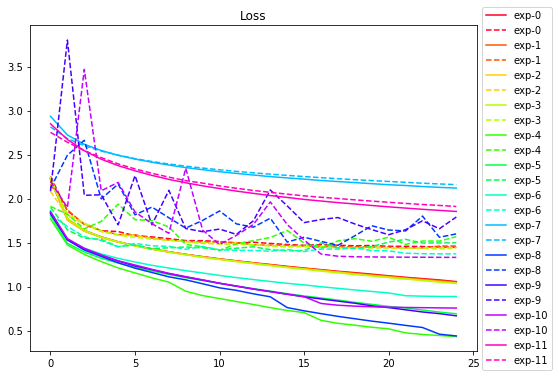

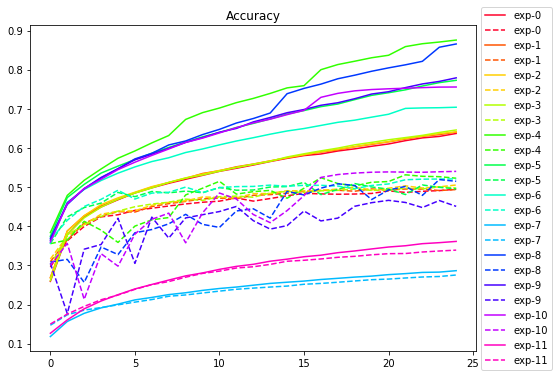

In [27]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()